In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/GISS-E2-1_diag_2014(0318).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.561436760425568e-12

In [6]:
data['k_no_ch3o2'].median()

8.19919935464859e-12

In [7]:
data['k_o3_oh'].median()

6.151791997253894e-14

In [8]:
data['k_o3_ho2'].median()

1.80257820186075e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.737215320338433e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     9.683807e+07
std      7.054596e+07
min      0.000000e+00
25%      3.985511e+07
50%      8.525960e+07
75%      1.417273e+08
max      4.505527e+08
Name: ho2_mole, dtype: float64

In [13]:
data['oh_mole'].describe()

count    9.720000e+05
mean     8.247508e+05
std      8.649706e+05
min      0.000000e+00
25%      1.853992e+05
50%      5.610260e+05
75%      1.203413e+06
max      1.821567e+07
Name: oh_mole, dtype: float64

In [14]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    943610.000000
mean        195.536042
std         122.331337
min           2.082493
25%         105.836388
50%         173.079441
75%         256.953460
max        2221.587200
Name: ratio_ho2_oh, dtype: float64

In [15]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    9.436100e+05
mean     3.535528e-01
std      1.963152e-01
min      6.170430e-16
25%      2.405777e-01
50%      3.370939e-01
75%      4.435036e-01
max      1.169109e+00
Name: P1_frac, dtype: float64

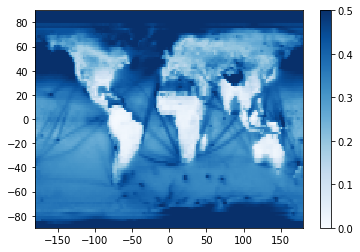

In [16]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
#data_land = data_land[data_land['P1_frac'] <1]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [17]:
data_mean['P1_frac'].describe()

count    16200.000000
mean         0.359484
std          0.138207
min          0.006149
25%          0.293909
50%          0.355479
75%          0.448624
max          0.773312
Name: P1_frac, dtype: float64

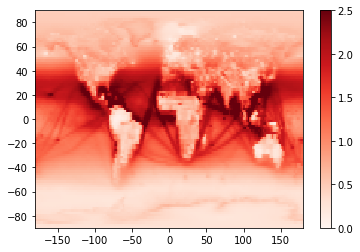

In [18]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [19]:
data = data.drop(['a','b','c'], axis=1)
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,k_oh_no2,o3prod_mole,o3loss_mole,lossch4_mole,lossco_mole,k_ch3o2_ch3o2,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,6.500000e-11,180282.318226,60381.383578,116011.84274,194108.87238,4.543124e-13,7.842498e+07,28.293193,157700.310115,0.874741
1,3.0,-89.0,1.0,2911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,6.500000e-11,180282.318226,60381.383578,116011.84274,194108.87238,4.543124e-13,7.842498e+07,28.293193,157700.310115,0.874741
2,5.0,-89.0,1.0,4911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,6.500000e-11,180282.318226,60381.383578,116011.84274,194108.87238,4.543124e-13,7.842498e+07,28.293193,157700.310115,0.874741
3,7.0,-89.0,1.0,6911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,6.500000e-11,180282.318226,60381.383578,116011.84274,194108.87238,4.543124e-13,7.842498e+07,28.293193,157700.310115,0.874741
4,9.0,-89.0,1.0,8911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,6.500000e-11,180282.318226,60381.383578,116011.84274,194108.87238,4.543124e-13,7.842498e+07,28.293193,157700.310115,0.874741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,6.500000e-11,0.000000,987.914941,0.00000,0.00000,4.684176e-13,0.000000e+00,NaN,0.000000,NaN
971996,-7.0,89.0,60.0,-6911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,6.500000e-11,0.000000,987.914941,0.00000,0.00000,4.684176e-13,0.000000e+00,NaN,0.000000,NaN
971997,-5.0,89.0,60.0,-4911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,6.500000e-11,0.000000,987.914941,0.00000,0.00000,4.684176e-13,0.000000e+00,NaN,0.000000,NaN
971998,-3.0,89.0,60.0,-2911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,6.500000e-11,0.000000,987.914941,0.00000,0.00000,4.684176e-13,0.000000e+00,NaN,0.000000,NaN


In [20]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/GISS-E2-1_diag_2014(0319).csv', index = False)